In [ ]:
!pip install gdown
!pip install ipython-autotime
%load_ext autotime

time: 2.15 ms (started: 2021-03-03 09:11:49 +00:00)


In [ ]:
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
!pip install -q torch-cluster -f https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
!pip install -q torch-geometric

time: 8.48 s (started: 2021-03-03 09:11:49 +00:00)


In [ ]:
!gdown "https://drive.google.com/uc?id=1j7h-SUy2gMJBds6eQalw4CFZC3O7Pr05"

Downloading...
From: https://drive.google.com/uc?id=1j7h-SUy2gMJBds6eQalw4CFZC3O7Pr05
To: /content/collaboration_network.edgelist
38.8MB [00:00, 44.8MB/s]
time: 3.53 s (started: 2021-03-03 09:11:57 +00:00)


In [ ]:
!gdown "https://drive.google.com/uc?id=1Qbi954Bwx-PplM8F_7TrB_blcqcB-bF2"

Downloading...
From: https://drive.google.com/uc?id=1Qbi954Bwx-PplM8F_7TrB_blcqcB-bF2
To: /content/train.csv
100% 305k/305k [00:00<00:00, 4.80MB/s]
time: 1.42 s (started: 2021-03-03 09:12:01 +00:00)


In [ ]:
!gdown "https://drive.google.com/uc?id=1obp93WcXFh22mZMhuLguKtIEPNaJXlyD"

Downloading...
From: https://drive.google.com/uc?id=1obp93WcXFh22mZMhuLguKtIEPNaJXlyD
To: /content/X_test_graph.csv
42.1MB [00:01, 41.5MB/s]
time: 2.62 s (started: 2021-03-03 09:12:02 +00:00)


In [ ]:
!gdown "https://drive.google.com/uc?id=1-7PiaxpmYiPKsRdMIlkKqfpJjR_zy5HE"

Downloading...
From: https://drive.google.com/uc?id=1-7PiaxpmYiPKsRdMIlkKqfpJjR_zy5HE
To: /content/Deepwalk_256_30_100.csv
1.19GB [00:15, 78.2MB/s]
time: 33.4 s (started: 2021-03-03 09:12:05 +00:00)


In [ ]:
!gdown "https://drive.google.com/uc?id=1AEn8P631y-pq6szgAbTm538oM6waf-5E"

Downloading...
From: https://drive.google.com/uc?id=1AEn8P631y-pq6szgAbTm538oM6waf-5E
To: /content/author_embedding.csv
683MB [00:15, 43.2MB/s]
time: 35.1 s (started: 2021-03-03 09:12:38 +00:00)


In [ ]:
!gdown "https://drive.google.com/uc?id=1yQuJlP_Igc5W2zZUEgupwvj9SNSfUTRV"

Downloading...
From: https://drive.google.com/uc?id=1yQuJlP_Igc5W2zZUEgupwvj9SNSfUTRV
To: /content/author_to_embeddings_scibert_uncased.npy
1.44GB [00:33, 43.5MB/s]
time: 1min 10s (started: 2021-03-03 09:13:13 +00:00)


In [ ]:
!gdown "https://drive.google.com/uc?id=1ewZowFKZNSXwaH9yt5Ad4-ieOHpyV1W1"

Downloading...
From: https://drive.google.com/uc?id=1ewZowFKZNSXwaH9yt5Ad4-ieOHpyV1W1
To: /content/X_train_graph.csv
4.67MB [00:00, 31.1MB/s]
time: 1.82 s (started: 2021-03-03 09:14:24 +00:00)


In [ ]:
!gdown "https://drive.google.com/uc?id=1hWycEy8rQ8e_krGyUhqGQiMBxZtD9SWy"

Downloading...
From: https://drive.google.com/uc?id=1hWycEy8rQ8e_krGyUhqGQiMBxZtD9SWy
To: /content/test.csv
2.47MB [00:00, 39.1MB/s]
time: 818 ms (started: 2021-03-03 09:14:26 +00:00)


In [ ]:
import networkx as nx
G = nx.read_edgelist('collaboration_network.edgelist',
                     delimiter=' ', nodetype=int)
n_nodes = G.number_of_nodes()
n_edges = G.number_of_edges()

time: 8.76 s (started: 2021-03-03 09:14:26 +00:00)


In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.preprocessing import MinMaxScaler

# read training data
df_train = pd.read_csv('train.csv', dtype={'authorID': np.int64, 'h_index': np.float32})
n_train = df_train.shape[0]

# read test data
df_test = pd.read_csv('test.csv', dtype={'authorID': np.int64})
n_test = df_test.shape[0]

time: 376 ms (started: 2021-03-03 09:14:35 +00:00)


In [ ]:
# Read train and test graph features
X_train_graph = pd.read_csv('X_train_graph.csv', index_col=0)
X_test_graph = pd.read_csv('X_test_graph.csv', index_col=0)

time: 517 ms (started: 2021-03-03 09:14:35 +00:00)


In [ ]:
# read embeddings of abstracts
embeddings_abstracts = np.load('author_to_embeddings_scibert_uncased.npy', allow_pickle=True).item()
embeddings_abstracts = pd.DataFrame.from_dict(embeddings_abstracts, orient='index')
embeddings_abstracts.reset_index(inplace=True)
embeddings_abstracts.rename(columns={"index": "authorID"}, inplace=True)

In [ ]:
embeddings_abstracts_2 = pd.read_csv("author_embedding.csv", header=None)
embeddings_abstracts_2.rename(columns={0: 'authorID'}, inplace=True)
embeddings_abstracts = embeddings_abstracts_2.merge(embeddings_abstracts, on="authorID")
embeddings_abstracts

In [ ]:
# embeddings_nodes = np.load('node_2_vec_128.npy', allow_pickle=True).item()
# embeddings_nodes = pd.DataFrame.from_dict(embeddings_nodes, orient='index')
embeddings_nodes = pd.read_csv("Deepwalk_256_30_100.csv")
embeddings_nodes

In [ ]:
# Merge train data
X_train_ = df_train.merge(X_train_graph, on="authorID")
X_train_embeddings = embeddings_abstracts.merge(embeddings_nodes, on="authorID")
X_train = X_train_.merge(X_train_embeddings, on="authorID")

In [ ]:
# Merge test data
X_test_ = df_test.merge(X_test_graph, on="authorID")
X_test_embeddings = embeddings_abstracts.merge(embeddings_nodes, on="authorID")
X_test = X_test_.merge(X_test_embeddings, on="authorID")

# Preprocessing of data for label prop

# Label prop

In [ ]:
import math

import torch

from torch.nn.parameter import Parameter
import torch.nn as nn
import torch.nn.functional as F


class GCNLPAConv(nn.Module):
    """
    A GCN-LPA layer. Please refer to: https://arxiv.org/abs/2002.06755
    """

    def __init__(self, in_features, out_features, adj, bias=True):
        super(GCNLPAConv, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = Parameter(torch.FloatTensor(in_features, out_features))
        if bias:
            self.bias = Parameter(torch.FloatTensor(out_features))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()
        self.adjacency_mask = Parameter(adj.clone()).to_dense()

    def reset_parameters(self):
        stdv = 1. / math.sqrt(self.weight.size(1))
        self.weight.data.uniform_(-stdv, stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv, stdv)

    def forward(self, x, adj, y):
        adj = adj.to_dense()
        # W * x
        support = torch.mm(x, self.weight)
        # Hadamard Product: A' = Hadamard(A, M)
        adj = adj * self.adjacency_mask
        # Row-Normalize: D^-1 * (A')
        adj = F.normalize(adj, p=1, dim=1)

        # output = D^-1 * A' * X * W
        output = torch.mm(adj, support)
        # y' = D^-1 * A' * y
        y_hat = torch.mm(adj, y)

        if self.bias is not None:
            return output + self.bias, y_hat
        else:
            return output, y_hat

    def __repr__(self):
        return self.__class__.__name__ + ' (' \
               + str(self.in_features) + ' -> ' \
               + str(self.out_features) + ')'

time: 3.41 s (started: 2021-03-03 00:12:01 +00:00)


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class GCNLPA(nn.Module):
    def __init__(self, nfeat, nhid, nclass, adj, dropout_rate):
        super(GCNLPA, self).__init__()

        self.gc1 = GCNLPAConv(nfeat, nhid, adj)
        self.gc2 = GCNLPAConv(nhid, nclass, adj)
        self.dropout = dropout_rate

    def forward(self, x, adj, y):
        x, y_hat = self.gc1(x, adj, y)
        x = F.relu(x)
        x = F.dropout(x, self.dropout, training=self.training)
        x, y_hat = self.gc2(x, adj, y_hat)
        return x, y_hat

time: 7.5 ms (started: 2021-03-03 08:58:01 +00:00)


In [ ]:
import pandas as pd
import numpy as np
import scipy.sparse as sp

df_train = pd.read_csv('train.csv', dtype={'authorID': np.int64, 'h_index': np.float32})
G_train = G.subgraph(df_train["authorID"].values)

time: 43.2 ms (started: 2021-03-03 09:01:03 +00:00)


In [ ]:
def normalize(mx):
    """Row-normalize sparse matrix"""
    rowsum = np.array(mx.sum(1))
    r_inv = np.power(rowsum, -1).flatten()
    r_inv[np.isinf(r_inv)] = 0.
    r_mat_inv = sp.diags(r_inv)
    mx = r_mat_inv.dot(mx)
    return mx

def sparse_mx_to_torch_sparse_tensor(sparse_mx):
    """Convert a scipy sparse matrix to a torch sparse tensor."""
    sparse_mx = sparse_mx.tocoo().astype(np.float32)
    indices = torch.from_numpy(
        np.vstack((sparse_mx.row, sparse_mx.col)).astype(np.int64))
    values = torch.from_numpy(sparse_mx.data)
    shape = torch.Size(sparse_mx.shape)
    return torch.sparse.FloatTensor(indices, values, shape)

time: 6.74 ms (started: 2021-03-03 09:01:03 +00:00)


In [ ]:
def get_graph_dataset(G):


In [ ]:
adj = nx.to_scipy_sparse_matrix(G_train)
adj = adj + adj.T.multiply(adj.T > adj) - adj.multiply(adj.T > adj)
features = normalize(features)
adj = adj + sp.eye(adj.shape[0])

In [ ]:
# from torch_geometric.utils import from_networkx

# data_g_train = from_networkx(G_train)
# edge_index = data_g_train.edge_index

time: 1.06 ms (started: 2021-03-03 00:12:08 +00:00)


In [ ]:
import scipy.sparse as sp


A_tilde = adj_t + sp.identity(adj_t.shape[0])
D_tilde = sp.diags(A_tilde.sum(axis=1).A1)
D_pow_tilde = D_tilde.power(-0.5)
DAD = D_pow_tilde @ A_tilde @ D_pow_tilde
DA = D_pow_tilde @ D_pow_tilde @ A_tilde

time: 1.28 s (started: 2021-03-03 00:12:08 +00:00)


In [ ]:
def sparse_to_torch_sparse(M):
    """Converts a sparse SciPy matrix to a sparse PyTorch tensor"""
    M = M.tocoo().astype(np.float32)
    indices = torch.from_numpy(np.vstack((M.row, M.col)).astype(np.int64))
    values = torch.from_numpy(M.data)
    shape = torch.Size(M.shape)
    return torch.sparse.FloatTensor(indices, values, shape)

time: 3.38 ms (started: 2021-03-03 00:12:09 +00:00)


In [ ]:
DAD = sparse_to_torch_sparse(DAD).to_dense().reshape(2, -1).long().to(DEVICE)
DA = sparse_to_torch_sparse(DA).to_dense().reshape(2, -1).long().to(DEVICE)

time: 6.15 s (started: 2021-03-03 00:12:09 +00:00)


In [ ]:
post = CorrectAndSmooth(num_correction_layers=100, correction_alpha=1.0,
                        num_smoothing_layers=50, smoothing_alpha=0.8,
                        autoscale=True)

time: 1.99 ms (started: 2021-03-03 00:12:15 +00:00)


In [ ]:
n = 23124
train_mask = torch.tensor(np.full(n, False), dtype=torch.bool).to(DEVICE)
train_mask[:int(0.8*n)] = True
test_mask = torch.tensor(np.full(n, False), dtype=torch.bool).to(DEVICE)
test_mask[int(0.8*n):] = True

time: 4.65 ms (started: 2021-03-03 00:12:15 +00:00)


In [ ]:
print('Correct')
y_train_cor = torch.tensor(np.load("y_train_final.npy")).to(DEVICE)
y_soft_cor = post.correct(y_soft, y_train_cor, train_mask, DAD.reshape(2, -1))

Correct
torch.Size([23124, 1])
time: 56.4 s (started: 2021-03-03 00:12:15 +00:00)


In [ ]:
from sklearn.metrics import mean_absolute_error

y_test_final = np.load("y_test_final.npy")
test_mask_cpu = test_mask.cpu().detach().numpy()
y_bi_test = y_soft_cor.cpu().detach().numpy()
print(f"Mean absolute error: {mean_absolute_error(y_test_final, y_bi_test[test_mask_cpu])}")

Mean absolute error: 3.4585139751434326
time: 7.02 ms (started: 2021-03-03 00:13:12 +00:00)


In [ ]:
print('Smooth')
y_soft_smooth = post.smooth(y_soft_cor, y_train_cor, train_mask, DA.reshape(2, -1))

Smooth
time: 16.5 ms (started: 2021-03-03 00:13:12 +00:00)


In [ ]:
y_tri_test = y_soft_smooth.cpu().detach().numpy()
print(f"Mean absolute error: {mean_absolute_error(y_test_final, y_tri_test[test_mask_cpu])}")

Mean absolute error: 8.9451904296875
time: 28.5 s (started: 2021-03-03 00:13:12 +00:00)


In [ ]:
a = pd.read_csv("predictions_MLP_maxim_net.csv")
b = pd.read_csv("predictions_MLP_concat_abstracts_3_42.csv")

time: 101 ms (started: 2021-03-03 00:18:05 +00:00)


In [ ]:
a[a["h_index_pred"]]

In [ ]:
from collections import Counter

ca = Counter(a["h_index_pred"])
cb = Counter(b["h_index_pred"])

time: 76.7 ms (started: 2021-03-03 00:22:05 +00:00)


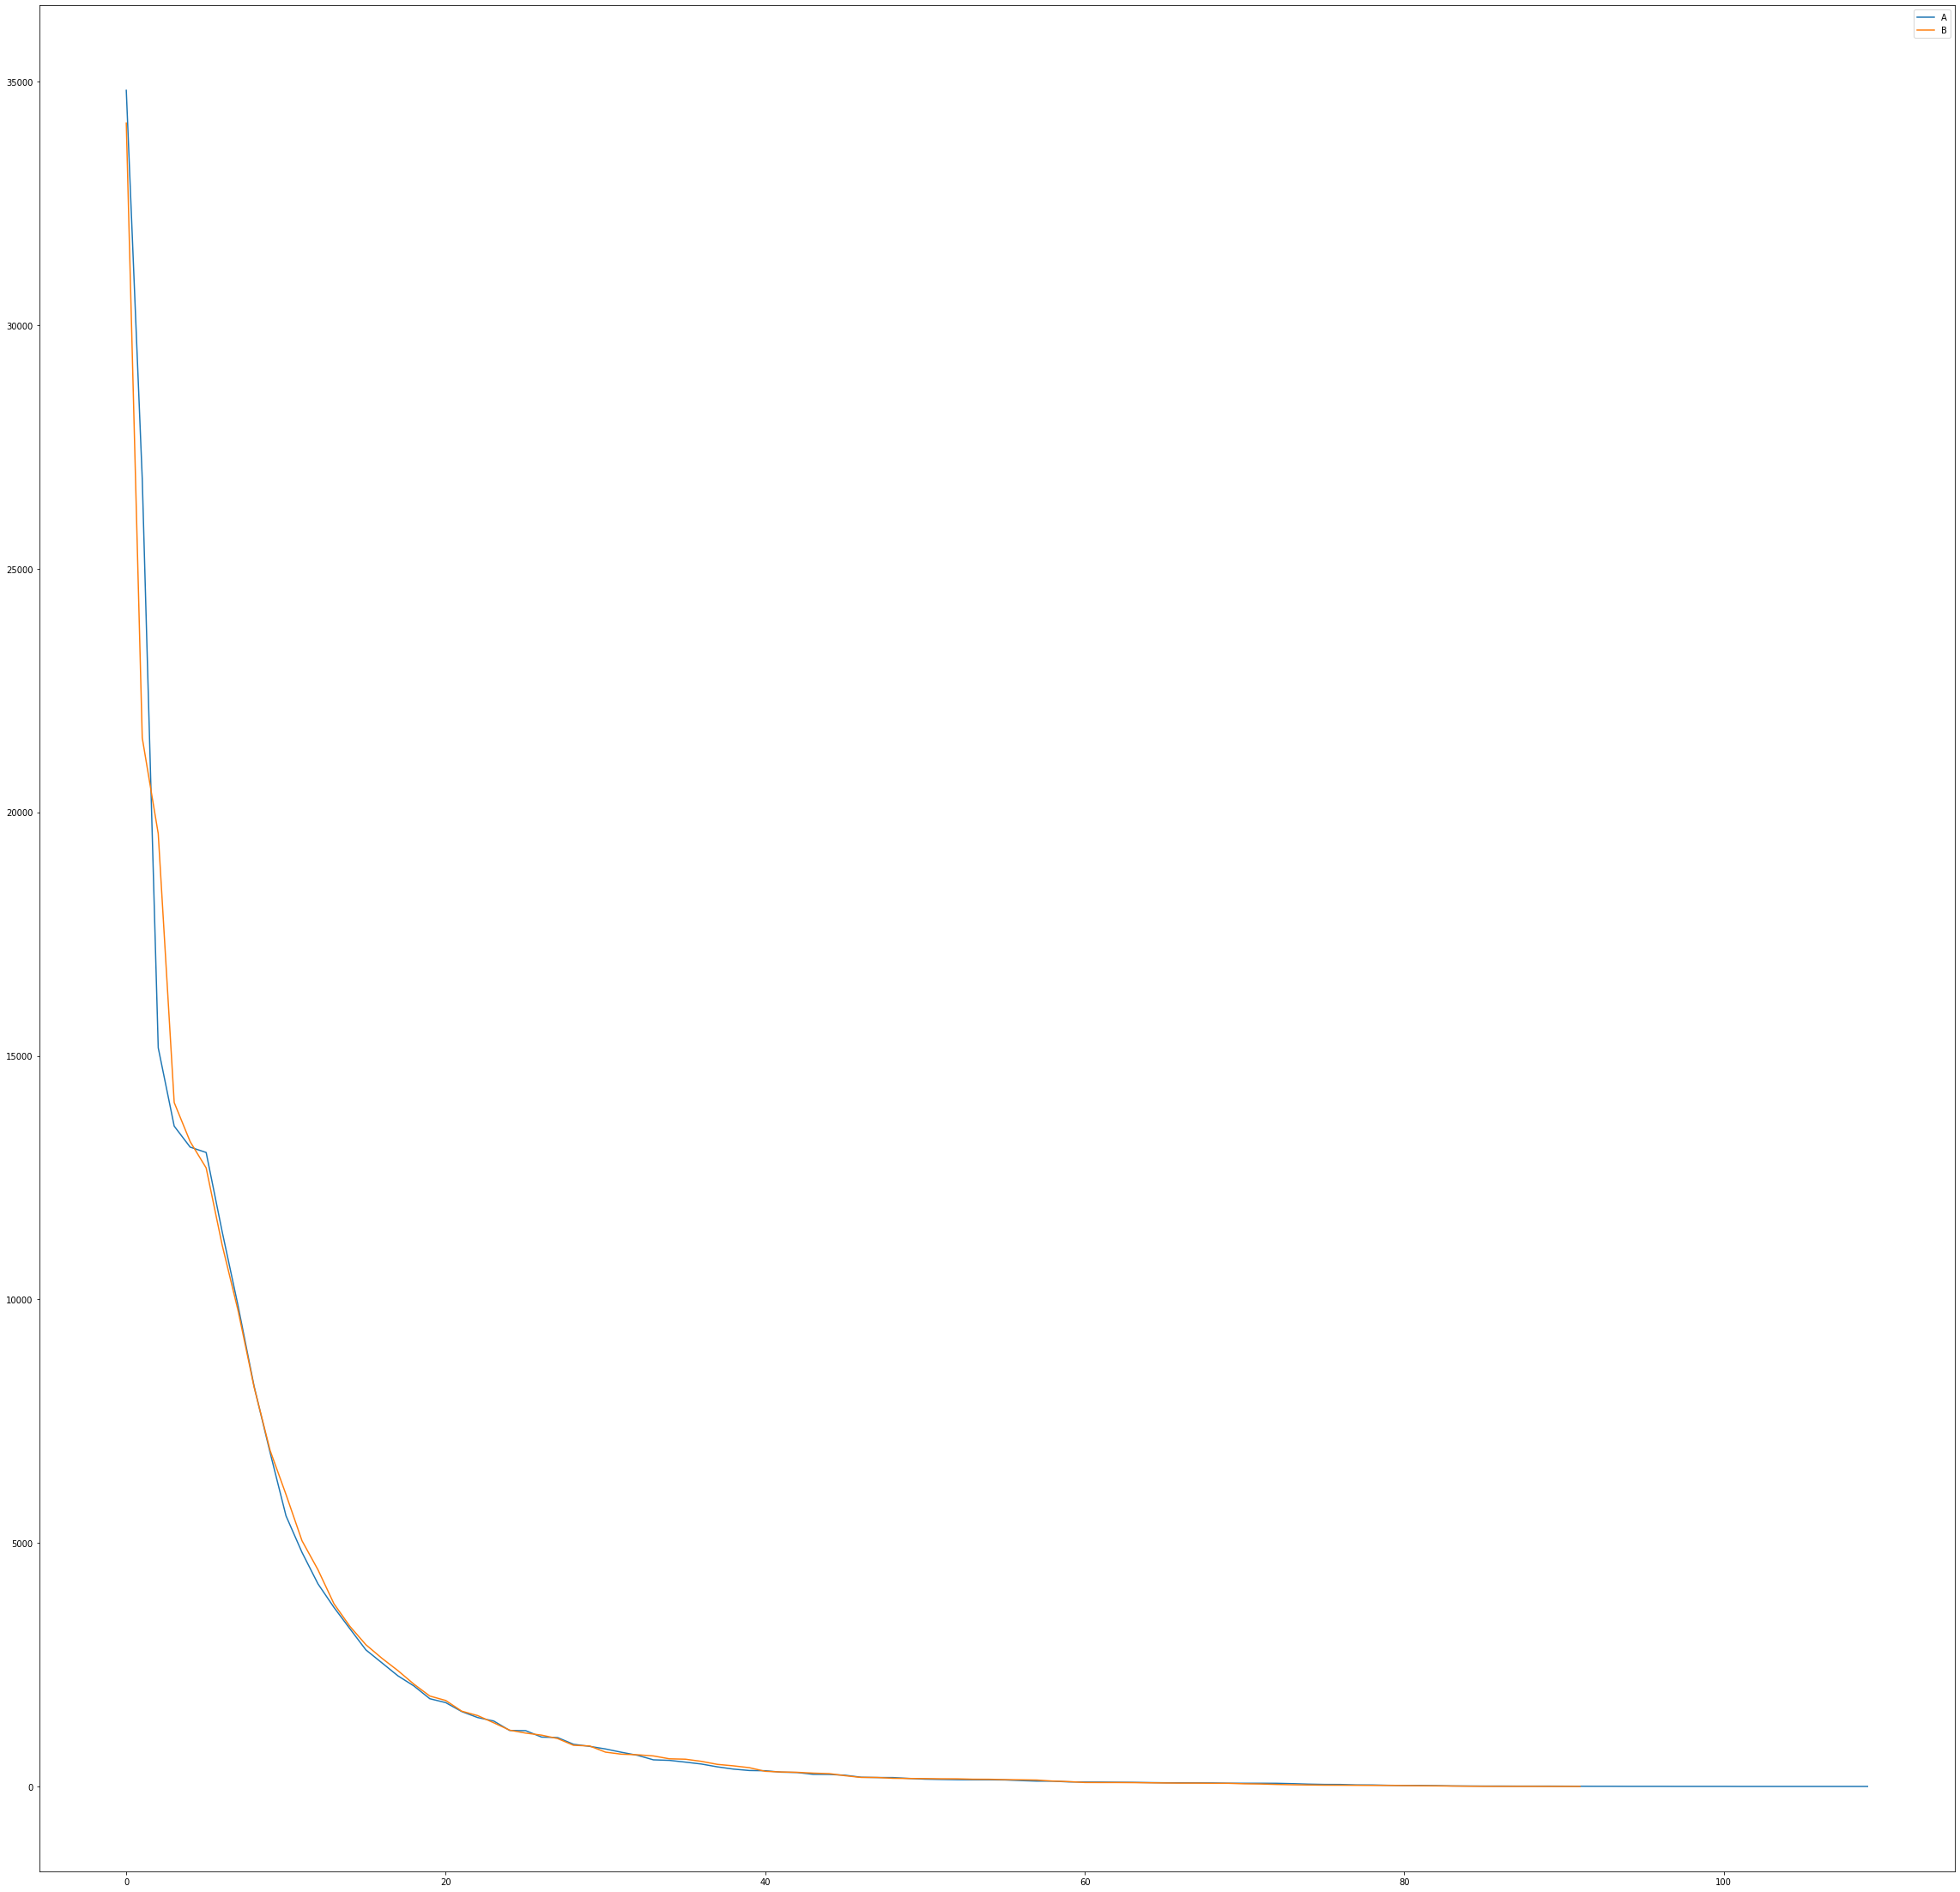

time: 676 ms (started: 2021-03-03 00:23:23 +00:00)


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 40))
plt.plot([x for _, x in ca.most_common()], label="A")
plt.plot([x for _, x in cb.most_common()], label="B")
plt.legend()